# Importing General Libraries

In [92]:
import os
import random
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
import IPython.display as ipd
from tqdm import tqdm_notebook as tqdm

# Importing Tensorflow Modules

In [93]:
import tensorflow as tf
import keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.models import Model, Sequential
from keras import optimizers
from keras.layers import Input, Conv1D, Conv2D,BatchNormalization, MaxPooling1D,MaxPooling2D, LSTM, Dense, Activation, Layer,Reshape
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

# Importing Data Analysis/Visualization Tools

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns

# Importing Sklearn Modules

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Importing HMM and Rest of the Modules

In [96]:
import librosa
import librosa.display
from hmmlearn import hmm

# Importing the Ravdees Dataset

In [126]:
dataset='./datasets/audio_speech_actors_01-24/'

In [127]:
emotions = []
paths = []

for actors in os.listdir(dataset):
    for actorfile in os.listdir(dataset+actors):
        emotion = actorfile.split('.')[0]
        emotion = int(emotion.split('-')[2])
        emotions.append(emotion)
        paths.append(dataset+actors+'/'+actorfile)

In [128]:
print(emotions[:10])
print(paths[:10])

[1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
['./datasets/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav', './datasets/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav', './datasets/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav', './datasets/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-02-01.wav', './datasets/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav', './datasets/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-02-01.wav', './datasets/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-01-01.wav', './datasets/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-02-01.wav', './datasets/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav', './datasets/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-02-01.wav']


# Creating Pandas Dataframe

In [129]:
df = pd.DataFrame({
    'Emotions':emotions,
    'Paths': paths
})

In [130]:
df

,Emotions,Paths
0,1,./datasets/audio_speech_actors_01-24/Actor_01/...
1,1,./datasets/audio_speech_actors_01-24/Actor_01/...
2,1,./datasets/audio_speech_actors_01-24/Actor_01/...
3,1,./datasets/audio_speech_actors_01-24/Actor_01/...
4,2,./datasets/audio_speech_actors_01-24/Actor_01/...
...,...,...
1435,8,./datasets/audio_speech_actors_01-24/Actor_24/...
1436,8,./datasets/audio_speech_actors_01-24/Actor_24/...
1437,8,./datasets/audio_speech_actors_01-24/Actor_24/...
1438,8,./datasets/audio_speech_actors_01-24/Actor_24/...


# Replacing Numerics with emotions

In [131]:
df['Emotions'].replace(
{
    1:'neutral',
    2:'calm',
    3:'happy',
    4:'sad',
    5:'angry',
    6:'fear',
    7:'disgust',
    8:'surprise'
}, inplace = True
)
df

,Emotions,Paths
0,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
1,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
2,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
3,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
4,calm,./datasets/audio_speech_actors_01-24/Actor_01/...
...,...,...
1435,surprise,./datasets/audio_speech_actors_01-24/Actor_24/...
1436,surprise,./datasets/audio_speech_actors_01-24/Actor_24/...
1437,surprise,./datasets/audio_speech_actors_01-24/Actor_24/...
1438,surprise,./datasets/audio_speech_actors_01-24/Actor_24/...


# Plot of Ravdees Dataset

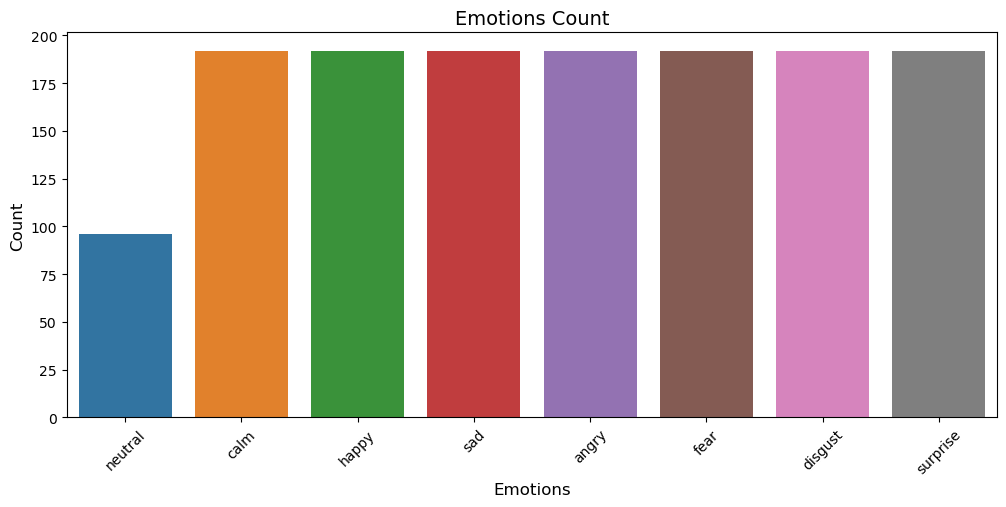

In [132]:
plt.figure(figsize=(12, 5))
plt.title('Emotions Count', size=14)
sns.countplot(data=df,x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
plt.show()

# Selecting only 5 emotions

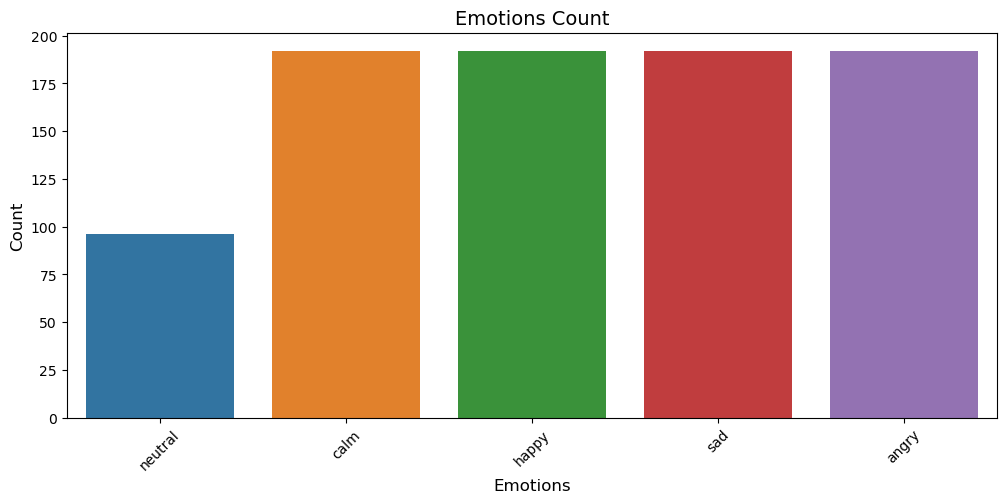

In [133]:
df=df[(df['Emotions']=='calm')|(df['Emotions']=='happy')|(df['Emotions']=='neutral')|(df['Emotions']=='sad')|(df['Emotions']=='angry')]
plt.figure(figsize=(12, 5))
plt.title('Emotions Count', size=14)
sns.countplot(data=df,x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
plt.show()

# Importing the Savee Dataset

In [34]:
dataset='./datasets/savee/AudioData/'
emotions = []
paths = []
Savee_sub = ["KL/","DC/","JE/","JK/"]

#  Creating Pandas Dataframe

In [35]:
for subfolder in Savee_sub:
    
    Savee_path = os.path.join(dataset, subfolder)
    #print(Savee_path)
    savee_directory_list = os.listdir(Savee_path)
    for file in savee_directory_list:
        #print(file)
        paths.append(Savee_path + file)
        #print(Savee_path + file)
        part = file
        ele = part[:-6]
        if ele=='a':
              emotions.append('angry')
        elif ele=='d':
              emotions.append('disgust')
        elif ele=='f':
              emotions.append('fear')
        elif ele=='h':
              emotions.append('happy')
        elif ele=='n':
              emotions.append('neutral')
        elif ele=='sa':
              emotions.append('sad')
        else:
              emotions.append('surprise')

# dataframe for emotion of files
emotions_df1 = pd.DataFrame(emotions, columns=['Emotions'])

# dataframe for path of files.
path_df1 = pd.DataFrame(paths, columns=['Paths'])
df1 = pd.concat([emotions_df1, path_df1], axis=1)
df1

,Emotions,Paths
0,angry,./datasets/savee/AudioData/KL/a01.wav
1,angry,./datasets/savee/AudioData/KL/a02.wav
2,angry,./datasets/savee/AudioData/KL/a03.wav
3,angry,./datasets/savee/AudioData/KL/a04.wav
4,angry,./datasets/savee/AudioData/KL/a05.wav
...,...,...
475,surprise,./datasets/savee/AudioData/JK/su11.wav
476,surprise,./datasets/savee/AudioData/JK/su12.wav
477,surprise,./datasets/savee/AudioData/JK/su13.wav
478,surprise,./datasets/savee/AudioData/JK/su14.wav


# Importing TESS Dataset

In [36]:
dataset='./datasets/Tess/TESS Toronto emotional speech set data/'

In [37]:
tess_directory_list = os.listdir(dataset)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(dataset + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(dataset + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Paths'])
df2 = pd.concat([emotion_df, path_df], axis=1)
df2

,Emotions,Paths
0,angry,./datasets/Tess/TESS Toronto emotional speech ...
1,angry,./datasets/Tess/TESS Toronto emotional speech ...
2,angry,./datasets/Tess/TESS Toronto emotional speech ...
3,angry,./datasets/Tess/TESS Toronto emotional speech ...
4,angry,./datasets/Tess/TESS Toronto emotional speech ...
...,...,...
2795,sad,./datasets/Tess/TESS Toronto emotional speech ...
2796,sad,./datasets/Tess/TESS Toronto emotional speech ...
2797,sad,./datasets/Tess/TESS Toronto emotional speech ...
2798,sad,./datasets/Tess/TESS Toronto emotional speech ...


# Concating all datasets

In [38]:
data_path = pd.concat([df,df1,df2], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path

,Emotions,Paths
0,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
1,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
2,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
3,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
4,calm,./datasets/audio_speech_actors_01-24/Actor_01/...
...,...,...
2795,sad,./datasets/Tess/TESS Toronto emotional speech ...
2796,sad,./datasets/Tess/TESS Toronto emotional speech ...
2797,sad,./datasets/Tess/TESS Toronto emotional speech ...
2798,sad,./datasets/Tess/TESS Toronto emotional speech ...


# Saving Dataframe as CSV file

In [39]:
data_path.to_csv('data_path.csv',index=False)

# Reading CSV file

In [14]:
df = pd.read_csv('data_path.csv')
#df = df.iloc[2700:,:]
df

,Emotions,Paths
0,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
1,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
2,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
3,neutral,./datasets/audio_speech_actors_01-24/Actor_01/...
4,calm,./datasets/audio_speech_actors_01-24/Actor_01/...
...,...,...
4715,sad,./datasets/Tess/TESS Toronto emotional speech ...
4716,sad,./datasets/Tess/TESS Toronto emotional speech ...
4717,sad,./datasets/Tess/TESS Toronto emotional speech ...
4718,sad,./datasets/Tess/TESS Toronto emotional speech ...


# Data Visualization

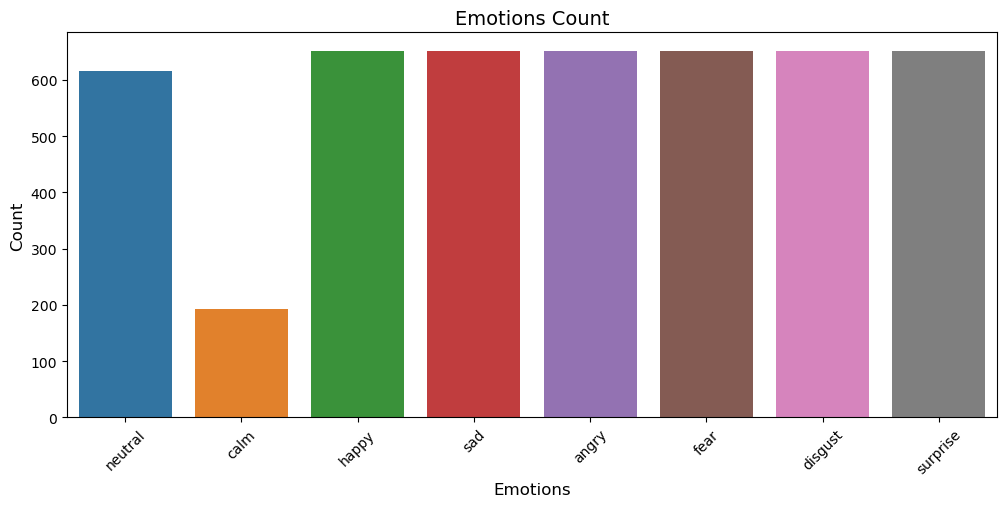

In [15]:
plt.figure(figsize=(12, 5))
plt.title('Emotions Count', size=14)
sns.countplot(data=df,x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
plt.show()

In [16]:
data,sr = librosa.load(df.iloc[0,1])
sr

22050

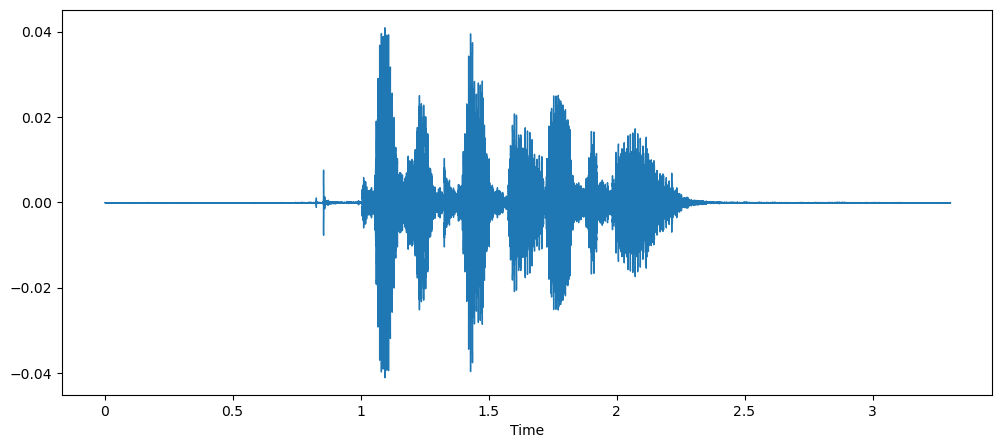

In [17]:
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
plt.show()
ipd.Audio(data,rate=sr)

# Features Extraction

Features like min_intensity, max_intensity, mean, stddev, median, relative_min_intensity, 

In [18]:
#!pip install praat-parselmouth

In [19]:
#Extracting Spectral Features
def extract_spec_features(path,data,sample_rate):
    attributes = {}
    # ZCR
    zcr = librosa.feature.zero_crossing_rate(y=data)
    attributes['zcr'] = np.mean(zcr)

    # # Chroma_stft
    # stft = np.abs(librosa.stft(data))
    # chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    # attributes['chroma_stft'] = chroma_stft

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13).T, axis=0)
    
    for count,ele in enumerate(mfcc):
      name = 'mfcc ' + str(count)
      attributes[name] = ele

    # Root Mean Square Value
    rms = librosa.feature.rms(y=data)
    attributes['rms'] = np.mean(rms)

    #Spectral Rolloff
    rolloff = librosa.feature.spectral_rolloff(y=data, sr=sample_rate, roll_percent=0.99)
    attributes['spectral rolloff'] = np.mean(rolloff)

    #Spectral Centroid
    spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sample_rate)[0]
    attributes['spectral centroids'] = np.mean(spectral_centroids)

    #LPC
    lpc= librosa.lpc(y=data, order=16)
    for count,ele in enumerate(lpc):
      name = 'lpc ' + str(count)
      attributes[name] = ele

    return attributes

In [20]:
import parselmouth
from feature_extraction_utils import *
import scipy

In [21]:
def extract_pros_features(sound):
  attributes = {}

  #Prosodic Features
  intensity_attributes = get_intensity_attributes(sound)[0]
  pitch_attributes = get_pitch_attributes(sound)[0]
  attributes.update(intensity_attributes)
  attributes.update(pitch_attributes)

  formant_attributes = get_formant_attributes(sound)[0]
  attributes.update(formant_attributes)


  #Voice Quality Features
  attributes['local_jitter'] = get_local_jitter(sound)
  attributes['local_shimmer'] = get_local_shimmer(sound)
  hnr_attributes = get_harmonics_to_noise_ratio_attributes(sound)[0]
  gne_attributes = get_glottal_to_noise_ratio_attributes(sound)[0]
  attributes.update(hnr_attributes)
  attributes.update(gne_attributes)


  # lfcc = get_lfcc(sound,num_coefficients=12)
  # for count,ele in enumerate(lfcc):
  #     name = 'lfcc ' + str(count)
  #     attributes[name] = ele
  
  return attributes

In [22]:
#Combine all features
def get_features(path):
    sound = parselmouth.Sound(path)
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    
    # without augmentation
    res_pros = extract_pros_features(sound)
    res_spec = extract_spec_features(path,data, sample_rate)

    result = res_pros
    result.update(res_spec)
    #print(result)
    
    
    return result

In [23]:
df.columns

Index(['Emotions', 'Paths'], dtype='object')

In [ ]:
#Convertung features into dataframe
X, Y, count = [], [], 1
for path, emotion in zip(df.Paths, df.Emotions):
    feature = get_features(path)
    X.append(feature)
    print("Feature Extraction Completed for {} audios out of {}".format(count,len(df.Paths)))
    count+=1
    Y.append(emotion)

Feature Extraction Completed for 1 audios out of 4720
Feature Extraction Completed for 2 audios out of 4720
Feature Extraction Completed for 3 audios out of 4720
Feature Extraction Completed for 4 audios out of 4720
Feature Extraction Completed for 5 audios out of 4720
Feature Extraction Completed for 6 audios out of 4720
Feature Extraction Completed for 7 audios out of 4720
Feature Extraction Completed for 8 audios out of 4720
Feature Extraction Completed for 9 audios out of 4720
Feature Extraction Completed for 10 audios out of 4720
Feature Extraction Completed for 11 audios out of 4720
Feature Extraction Completed for 12 audios out of 4720
Feature Extraction Completed for 13 audios out of 4720
Feature Extraction Completed for 14 audios out of 4720
Feature Extraction Completed for 15 audios out of 4720
Feature Extraction Completed for 16 audios out of 4720
Feature Extraction Completed for 17 audios out of 4720
Feature Extraction Completed for 18 audios out of 4720
Feature Extraction 

Feature Extraction Completed for 150 audios out of 4720
Feature Extraction Completed for 151 audios out of 4720
Feature Extraction Completed for 152 audios out of 4720
Feature Extraction Completed for 153 audios out of 4720
Feature Extraction Completed for 154 audios out of 4720
Feature Extraction Completed for 155 audios out of 4720
Feature Extraction Completed for 156 audios out of 4720
Feature Extraction Completed for 157 audios out of 4720
Feature Extraction Completed for 158 audios out of 4720
Feature Extraction Completed for 159 audios out of 4720
Feature Extraction Completed for 160 audios out of 4720
Feature Extraction Completed for 161 audios out of 4720
Feature Extraction Completed for 162 audios out of 4720
Feature Extraction Completed for 163 audios out of 4720
Feature Extraction Completed for 164 audios out of 4720
Feature Extraction Completed for 165 audios out of 4720
Feature Extraction Completed for 166 audios out of 4720
Feature Extraction Completed for 167 audios out 

Feature Extraction Completed for 297 audios out of 4720
Feature Extraction Completed for 298 audios out of 4720
Feature Extraction Completed for 299 audios out of 4720
Feature Extraction Completed for 300 audios out of 4720
Feature Extraction Completed for 301 audios out of 4720
Feature Extraction Completed for 302 audios out of 4720
Feature Extraction Completed for 303 audios out of 4720
Feature Extraction Completed for 304 audios out of 4720
Feature Extraction Completed for 305 audios out of 4720
Feature Extraction Completed for 306 audios out of 4720
Feature Extraction Completed for 307 audios out of 4720
Feature Extraction Completed for 308 audios out of 4720
Feature Extraction Completed for 309 audios out of 4720
Feature Extraction Completed for 310 audios out of 4720
Feature Extraction Completed for 311 audios out of 4720
Feature Extraction Completed for 312 audios out of 4720
Feature Extraction Completed for 313 audios out of 4720
Feature Extraction Completed for 314 audios out 

Feature Extraction Completed for 444 audios out of 4720
Feature Extraction Completed for 445 audios out of 4720
Feature Extraction Completed for 446 audios out of 4720
Feature Extraction Completed for 447 audios out of 4720
Feature Extraction Completed for 448 audios out of 4720
Feature Extraction Completed for 449 audios out of 4720
Feature Extraction Completed for 450 audios out of 4720
Feature Extraction Completed for 451 audios out of 4720
Feature Extraction Completed for 452 audios out of 4720
Feature Extraction Completed for 453 audios out of 4720
Feature Extraction Completed for 454 audios out of 4720
Feature Extraction Completed for 455 audios out of 4720
Feature Extraction Completed for 456 audios out of 4720
Feature Extraction Completed for 457 audios out of 4720
Feature Extraction Completed for 458 audios out of 4720
Feature Extraction Completed for 459 audios out of 4720
Feature Extraction Completed for 460 audios out of 4720
Feature Extraction Completed for 461 audios out 

# Saving Features Dataframe and Saving as CSV file

In [52]:
features = pd.DataFrame(X)
features['labels'] = Y
features.to_csv('final_features.csv', index=False)
features

,min_intensity,relative_min_intensity_time,max_intensity,relative_max_intensity_time,mean_intensity,stddev_intensity,q1_intensity,median_intensity,q3_intensity,voiced_fraction,...,lpc 8,lpc 9,lpc 10,lpc 11,lpc 12,lpc 13,lpc 14,lpc 15,lpc 16,labels
0,32.471322,0.970605,66.860188,0.759000,53.929025,7.636521,49.452525,209.064447,60.272230,0.737705,...,0.342166,-0.079984,0.453958,-0.432973,-0.066975,0.032183,0.293694,-0.254103,0.086270,happy
1,31.803736,0.026757,67.406864,0.766271,54.744394,8.561003,48.902271,213.635224,61.841657,0.717703,...,0.153355,-0.362408,0.129328,-0.080665,0.171538,-0.121069,0.108122,-0.188908,0.137789,happy
2,38.500985,0.642592,70.757380,0.821316,56.816892,8.196347,52.224708,223.617877,63.130089,0.779904,...,0.472995,-0.085618,0.281916,-0.536035,0.223745,0.053023,0.188035,-0.384867,0.183500,happy
3,26.139308,0.935054,70.149675,0.783244,57.274899,8.794602,53.424077,247.360552,63.463166,0.784615,...,0.119742,-0.053473,0.309304,-0.486684,0.155097,0.081208,0.149634,-0.250273,0.106622,happy
4,39.074503,0.024305,67.502827,0.182730,56.179306,6.607854,51.759626,220.803939,60.924774,0.827957,...,0.469974,-0.256963,0.482060,-0.499846,0.257043,-0.083191,0.131128,-0.241369,0.141347,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,44.253752,0.951405,72.923695,0.210681,60.694505,8.011336,54.500523,211.023333,68.678237,0.610092,...,0.518317,-0.386994,0.532699,-0.484604,0.224811,-0.273583,0.241582,-0.215805,0.131050,sad
2016,26.175432,0.685048,71.575267,0.189769,62.541661,9.869020,60.552047,188.668788,69.080976,0.790476,...,0.140940,-0.271425,0.616396,-0.657145,0.336206,-0.025783,0.067266,-0.135264,0.045278,sad
2017,40.686715,0.655950,74.518241,0.197564,63.142310,9.004383,56.243919,212.456688,71.154143,0.628440,...,0.338774,-0.324442,0.322130,-0.291724,0.201567,-0.275192,0.187054,-0.126006,0.078195,sad
2018,25.868657,0.972722,71.695164,0.209971,59.304193,10.535800,54.980554,209.391692,67.846962,0.689956,...,0.431650,-0.470187,0.573734,-0.538877,0.285892,-0.268083,0.295953,-0.150958,0.050620,sad


# Reading Features CSV File

In [134]:
features=pd.read_csv('final_features.csv')
features

,min_intensity,relative_min_intensity_time,max_intensity,relative_max_intensity_time,mean_intensity,stddev_intensity,q1_intensity,median_intensity,q3_intensity,voiced_fraction,...,lpc 8,lpc 9,lpc 10,lpc 11,lpc 12,lpc 13,lpc 14,lpc 15,lpc 16,labels
0,-29.946888,0.152823,58.271623,0.329651,14.223721,28.492755,-11.499329,108.562358,44.370100,0.308869,...,0.173927,-0.155592,0.324991,-0.429968,0.364694,-0.322609,0.257028,-0.096783,0.029952,neutral
1,-25.205404,0.922790,58.868227,0.331328,16.325578,26.892895,-7.461864,115.315859,44.967199,0.321212,...,0.355244,-0.162506,0.192332,-0.318596,0.290696,-0.253183,0.195206,-0.096100,0.046320,neutral
2,-36.745340,0.888008,59.771088,0.352591,15.328581,28.831822,-10.578722,109.140340,47.622651,0.325077,...,0.423425,-0.374454,0.340582,-0.227947,0.196831,-0.286447,0.130242,-0.071464,0.091927,neutral
3,-27.922216,0.263190,59.609558,0.359729,16.535976,27.157397,-4.971113,107.551108,46.485492,0.313099,...,0.284348,-0.251789,0.318593,-0.238981,0.128731,-0.045675,-0.024268,-0.057069,0.075718,neutral
4,-45.045259,0.139417,55.257333,0.327768,14.555816,27.113075,-11.324849,114.902163,41.565891,0.331429,...,0.273575,-0.167573,0.194335,-0.216877,0.164320,-0.067093,0.048118,-0.032487,0.036471,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,44.253752,0.951405,72.923695,0.210681,60.694505,8.011336,54.500523,211.023333,68.678237,0.610092,...,0.518317,-0.386994,0.532699,-0.484604,0.224811,-0.273583,0.241582,-0.215805,0.131050,sad
4716,26.175432,0.685048,71.575267,0.189769,62.541661,9.869020,60.552047,188.668788,69.080976,0.790476,...,0.140940,-0.271425,0.616396,-0.657145,0.336206,-0.025783,0.067266,-0.135264,0.045278,sad
4717,40.686715,0.655950,74.518241,0.197564,63.142310,9.004383,56.243919,212.456688,71.154143,0.628440,...,0.338774,-0.324442,0.322130,-0.291724,0.201567,-0.275192,0.187054,-0.126006,0.078195,sad
4718,25.868657,0.972722,71.695164,0.209971,59.304193,10.535800,54.980554,209.391692,67.846962,0.689956,...,0.431650,-0.470187,0.573734,-0.538877,0.285892,-0.268083,0.295953,-0.150958,0.050620,sad


In [135]:
features=features[(features['labels']=='calm')|(features['labels']=='angry')|(features['labels']=='neutral')|(features['labels']=='happy')|(features['labels']=='sad')]
features

,min_intensity,relative_min_intensity_time,max_intensity,relative_max_intensity_time,mean_intensity,stddev_intensity,q1_intensity,median_intensity,q3_intensity,voiced_fraction,...,lpc 8,lpc 9,lpc 10,lpc 11,lpc 12,lpc 13,lpc 14,lpc 15,lpc 16,labels
0,-29.946888,0.152823,58.271623,0.329651,14.223721,28.492755,-11.499329,108.562358,44.370100,0.308869,...,0.173927,-0.155592,0.324991,-0.429968,0.364694,-0.322609,0.257028,-0.096783,0.029952,neutral
1,-25.205404,0.922790,58.868227,0.331328,16.325578,26.892895,-7.461864,115.315859,44.967199,0.321212,...,0.355244,-0.162506,0.192332,-0.318596,0.290696,-0.253183,0.195206,-0.096100,0.046320,neutral
2,-36.745340,0.888008,59.771088,0.352591,15.328581,28.831822,-10.578722,109.140340,47.622651,0.325077,...,0.423425,-0.374454,0.340582,-0.227947,0.196831,-0.286447,0.130242,-0.071464,0.091927,neutral
3,-27.922216,0.263190,59.609558,0.359729,16.535976,27.157397,-4.971113,107.551108,46.485492,0.313099,...,0.284348,-0.251789,0.318593,-0.238981,0.128731,-0.045675,-0.024268,-0.057069,0.075718,neutral
4,-45.045259,0.139417,55.257333,0.327768,14.555816,27.113075,-11.324849,114.902163,41.565891,0.331429,...,0.273575,-0.167573,0.194335,-0.216877,0.164320,-0.067093,0.048118,-0.032487,0.036471,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,44.253752,0.951405,72.923695,0.210681,60.694505,8.011336,54.500523,211.023333,68.678237,0.610092,...,0.518317,-0.386994,0.532699,-0.484604,0.224811,-0.273583,0.241582,-0.215805,0.131050,sad
4716,26.175432,0.685048,71.575267,0.189769,62.541661,9.869020,60.552047,188.668788,69.080976,0.790476,...,0.140940,-0.271425,0.616396,-0.657145,0.336206,-0.025783,0.067266,-0.135264,0.045278,sad
4717,40.686715,0.655950,74.518241,0.197564,63.142310,9.004383,56.243919,212.456688,71.154143,0.628440,...,0.338774,-0.324442,0.322130,-0.291724,0.201567,-0.275192,0.187054,-0.126006,0.078195,sad
4718,25.868657,0.972722,71.695164,0.209971,59.304193,10.535800,54.980554,209.391692,67.846962,0.689956,...,0.431650,-0.470187,0.573734,-0.538877,0.285892,-0.268083,0.295953,-0.150958,0.050620,sad


In [136]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 4719
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   min_intensity                     2764 non-null   float64
 1   relative_min_intensity_time       2764 non-null   float64
 2   max_intensity                     2764 non-null   float64
 3   relative_max_intensity_time       2764 non-null   float64
 4   mean_intensity                    2764 non-null   float64
 5   stddev_intensity                  2764 non-null   float64
 6   q1_intensity                      2764 non-null   float64
 7   median_intensity                  2764 non-null   float64
 8   q3_intensity                      2764 non-null   float64
 9   voiced_fraction                   2764 non-null   float64
 10  min_pitch                         2764 non-null   float64
 11  relative_min_pitch_time           2764 non-null   float64
 12  max_pi

# Feature Selection

In [137]:
#Splitting Train and Test set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features.iloc[:,0:80],
    features['labels'],
    test_size=0.3,
    random_state=0)

In [138]:
X_train.corr()


,min_intensity,relative_min_intensity_time,max_intensity,relative_max_intensity_time,mean_intensity,stddev_intensity,q1_intensity,median_intensity,q3_intensity,voiced_fraction,...,lpc 6,lpc 7,lpc 8,lpc 9,lpc 10,lpc 11,lpc 12,lpc 13,lpc 14,lpc 15
min_intensity,1.000000,0.427170,0.312786,-0.087399,0.823082,-0.884153,0.641132,-0.078573,0.458770,0.552381,...,0.010191,-0.010190,0.010189,-0.010188,0.010188,-0.010188,0.010190,0.010184,-0.010164,-0.010192
relative_min_intensity_time,0.427170,1.000000,0.281699,-0.045140,0.477558,-0.403582,0.416841,-0.000267,0.380731,0.310351,...,0.028386,-0.028385,0.028383,-0.028383,0.028383,-0.028383,0.028385,0.028376,-0.028355,-0.028383
max_intensity,0.312786,0.281699,1.000000,0.034450,0.563401,-0.204784,0.430562,0.433402,0.924974,0.170897,...,0.030316,-0.030313,0.030309,-0.030307,0.030306,-0.030305,0.030309,0.030294,-0.030273,-0.030305
relative_max_intensity_time,-0.087399,-0.045140,0.034450,1.000000,-0.074557,0.088563,-0.083280,0.170895,0.002410,-0.084185,...,-0.025989,0.025988,-0.025988,0.025987,-0.025987,0.025986,-0.025984,-0.025989,0.026004,0.025981
mean_intensity,0.823082,0.477558,0.563401,-0.074557,1.000000,-0.875906,0.848151,0.130302,0.736472,0.709434,...,0.011043,-0.011042,0.011040,-0.011039,0.011039,-0.011039,0.011043,0.011031,-0.010997,-0.011047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lpc 11,-0.010188,-0.028383,-0.030305,0.025986,-0.011039,0.005807,-0.006235,0.036868,-0.016358,0.010819,...,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000
lpc 12,0.010190,0.028385,0.030309,-0.025984,0.011043,-0.005809,0.006239,-0.036864,0.016363,-0.010816,...,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000
lpc 13,0.010184,0.028376,0.030294,-0.025989,0.011031,-0.005804,0.006227,-0.036876,0.016347,-0.010824,...,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000
lpc 14,-0.010164,-0.028355,-0.030273,0.026004,-0.010997,0.005780,-0.006184,0.036930,-0.016321,0.010868,...,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000


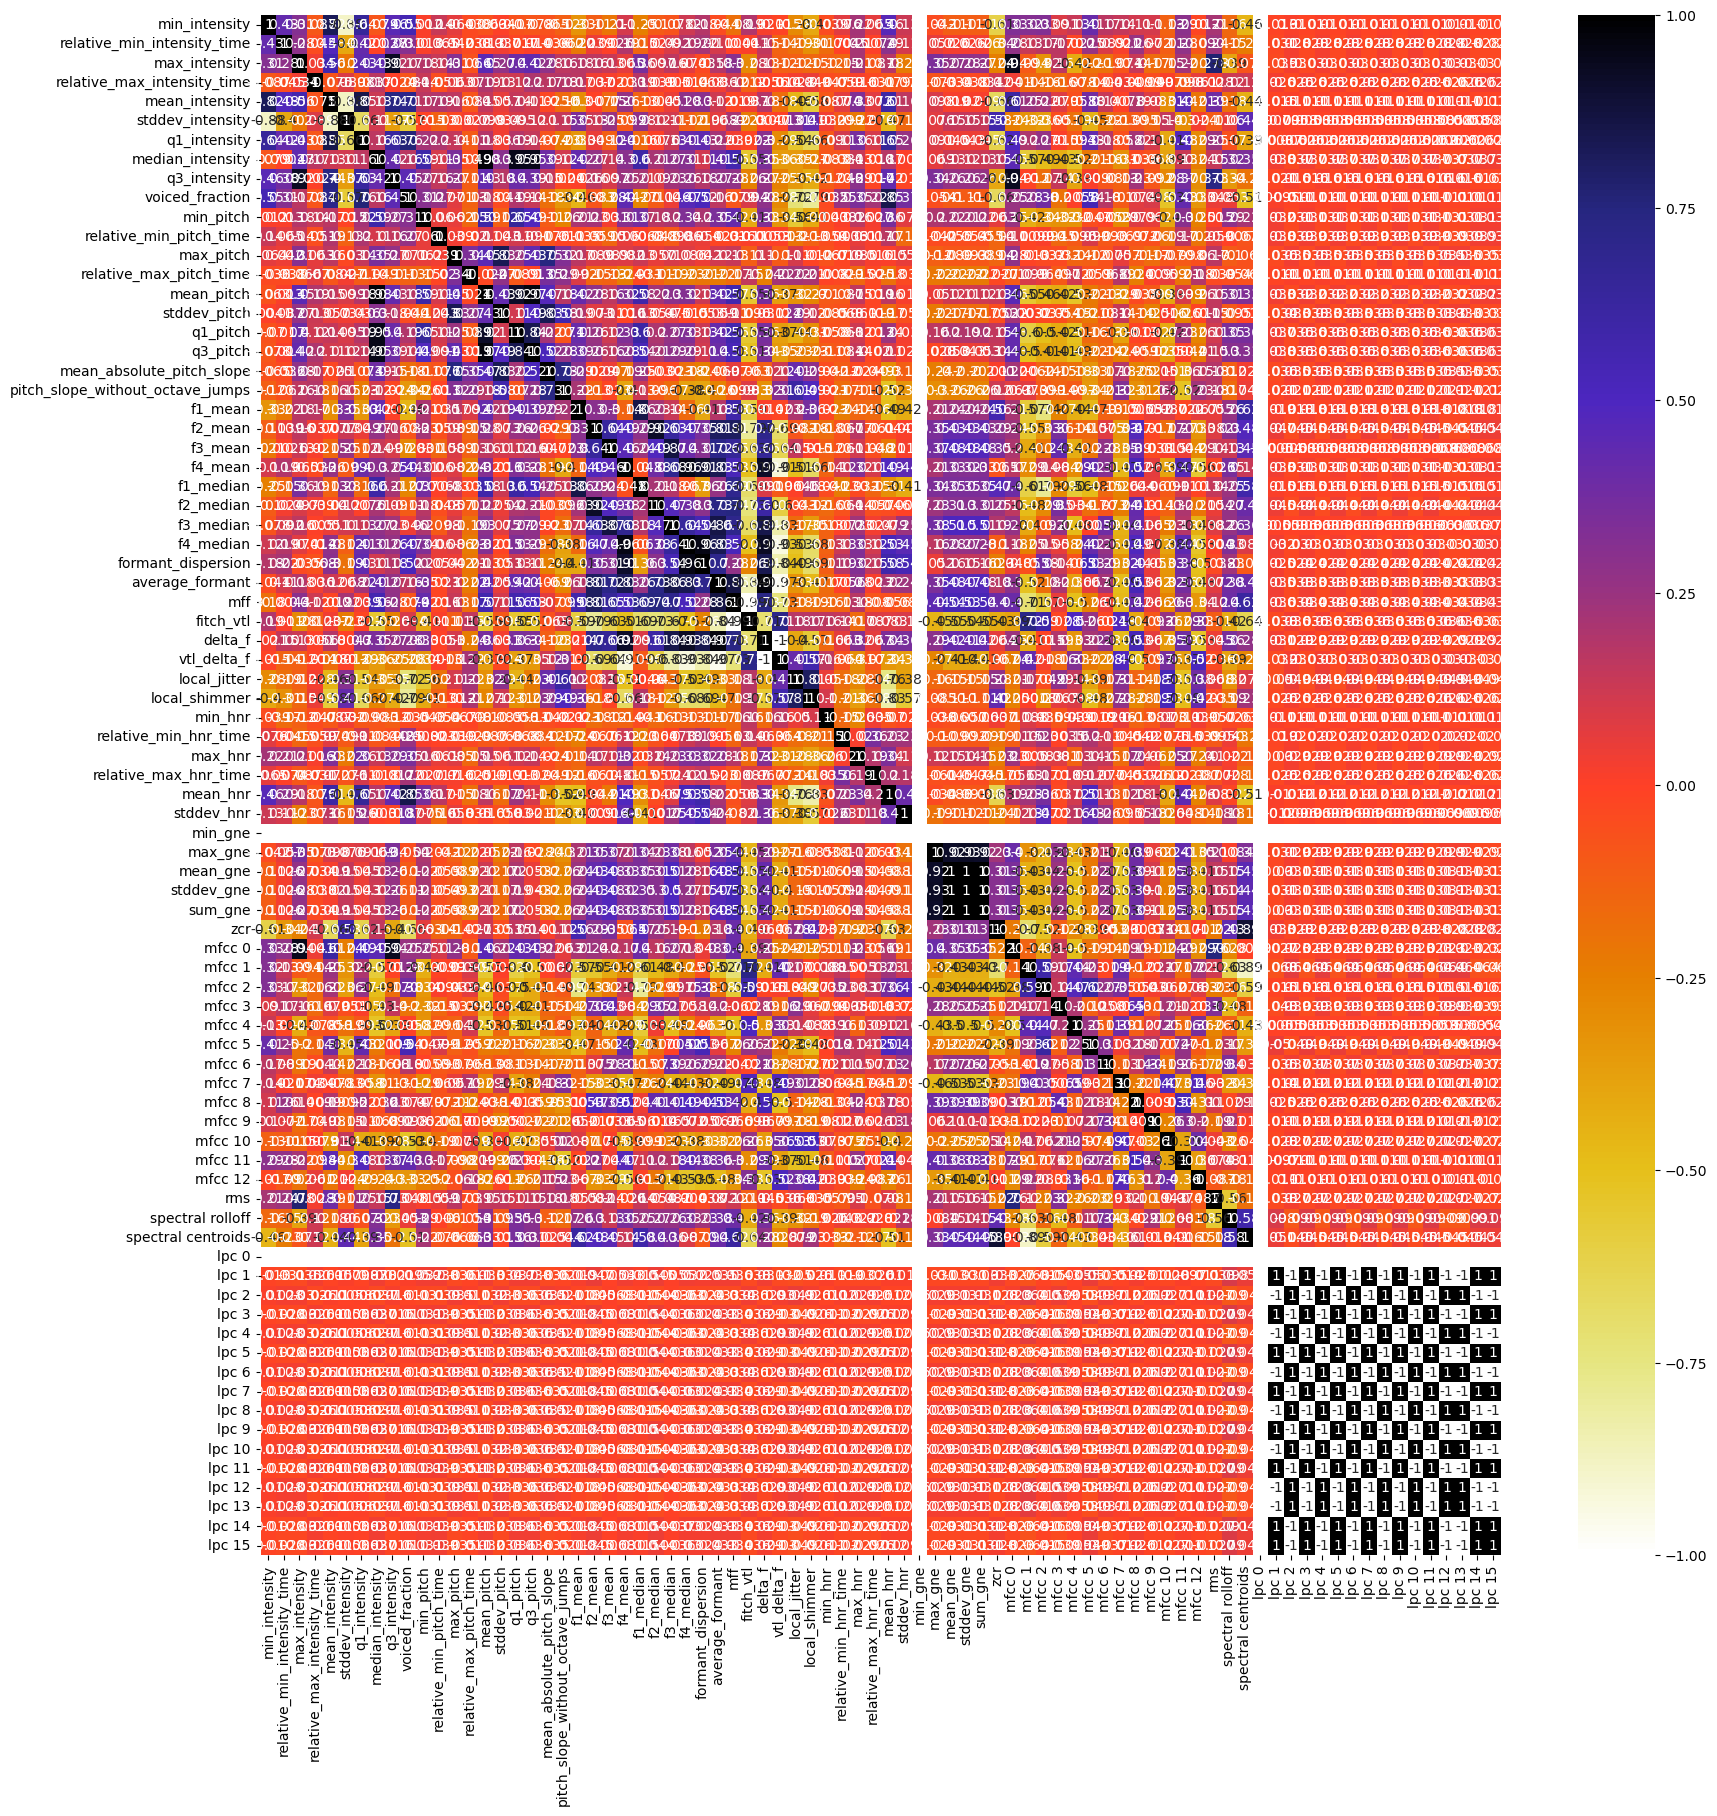

In [139]:
plt.figure(figsize=(20,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [140]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [141]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

46

In [142]:
corr_features

{'average_formant',
 'delta_f',
 'f1_median',
 'f2_median',
 'f3_median',
 'f4_median',
 'fitch_vtl',
 'formant_dispersion',
 'local_jitter',
 'local_shimmer',
 'lpc 10',
 'lpc 11',
 'lpc 12',
 'lpc 13',
 'lpc 14',
 'lpc 15',
 'lpc 2',
 'lpc 3',
 'lpc 4',
 'lpc 5',
 'lpc 6',
 'lpc 7',
 'lpc 8',
 'lpc 9',
 'mean_absolute_pitch_slope',
 'mean_gne',
 'mean_hnr',
 'mean_intensity',
 'mean_pitch',
 'mfcc 0',
 'mfcc 1',
 'mfcc 2',
 'mff',
 'pitch_slope_without_octave_jumps',
 'q1_intensity',
 'q1_pitch',
 'q3_intensity',
 'q3_pitch',
 'rms',
 'spectral centroids',
 'stddev_gne',
 'stddev_intensity',
 'stddev_pitch',
 'sum_gne',
 'voiced_fraction',
 'vtl_delta_f'}

In [143]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,min_intensity,relative_min_intensity_time,max_intensity,relative_max_intensity_time,median_intensity,min_pitch,relative_min_pitch_time,max_pitch,relative_max_pitch_time,f1_mean,...,mfcc 6,mfcc 7,mfcc 8,mfcc 9,mfcc 10,mfcc 11,mfcc 12,spectral rolloff,lpc 0,lpc 1
3517,27.464881,0.670680,79.260198,0.201972,245.361816,194.307986,0.733192,354.665671,0.352105,576.862481,...,-1.278384,-21.719402,0.026640,-3.869004,-14.641195,6.899535,-12.302625,9670.173220,1.0,-0.859594
1734,23.917803,0.925365,86.302922,0.753873,194.251496,103.565738,0.842862,447.170320,0.333550,560.200294,...,-23.459019,-2.696388,-13.955413,-1.873473,1.056181,-9.612832,-1.554623,5980.747477,1.0,-3.955987
2099,34.285423,0.663547,72.540884,0.138795,251.397436,161.507957,0.966488,299.519271,0.120929,526.119188,...,-11.980360,-21.110245,-10.560396,4.163368,-15.170033,6.749725,3.538332,9289.092548,1.0,-1.623366
801,-330.505544,0.041200,55.868060,0.350756,223.992329,164.689816,0.688700,340.751870,0.308120,556.027372,...,-11.860766,-12.006995,-4.654228,-10.351198,-6.718068,-7.837921,-8.088241,9864.101156,1.0,-1.075359
2909,30.369667,0.023620,63.092680,0.278405,187.936579,174.472228,0.725606,218.379851,0.145196,400.829185,...,-1.716371,-11.899016,-16.158157,-5.468730,-14.075038,-2.183553,-4.456447,9441.780065,1.0,-1.596322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,47.319943,0.950083,81.337717,0.725644,259.533241,182.822296,0.920779,410.525755,0.120844,521.542013,...,-6.240653,-15.116213,2.356257,-8.118571,-14.221668,14.261352,-14.833384,9533.520968,1.0,-2.048624
1087,-6.605823,0.037076,49.866693,0.440143,100.847745,84.632167,0.616073,248.298947,0.299719,469.681411,...,-2.909188,-4.895729,-5.381702,3.316468,5.391099,-2.739913,-0.586599,9890.319824,1.0,-0.690933
3143,24.020971,0.672719,62.644212,0.523786,206.308291,104.915062,0.872328,511.251628,0.848425,418.962309,...,1.552895,-6.979762,-9.534002,-2.531512,-7.511559,-3.313086,-5.767600,9548.779297,1.0,-1.279659
1353,-9.081116,0.052142,83.002486,0.601301,308.221991,221.746439,0.642358,394.794248,0.334298,645.738857,...,-8.160122,-7.644402,-12.261263,-9.210244,-6.193436,-6.260538,-6.067951,9971.468099,1.0,-1.827676


In [187]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(features, test_size=0.2,shuffle = True)
#train.drop(corr_features,axis=1,inplace=True)
#test.drop(corr_features,axis=1,inplace=True)

In [188]:
emotions = sorted(set(features.labels))
emotions

['angry', 'calm', 'happy', 'neutral', 'sad']

In [175]:
class HMMTrainer(object):
    def __init__(self, model_name='GaussianHMM', n_components=30, cov_type='diag', n_iter=1000):
        self.model_name = model_name
        self.n_components = n_components
        self.cov_type = cov_type
        self.n_iter = n_iter
        self.models = []
        if self.model_name == 'GaussianHMM':
            self.model = hmm.GaussianHMM(n_components=self.n_components,covariance_type=self.cov_type,n_iter=self.n_iter)
        else:
            raise TypeError('Invalid model type') 

    def train(self, X):
        np.seterr(all='ignore')
        self.models.append(self.model.fit(X))
        # Run the model on input data
    def get_score(self, input_data):
        return self.model.score(input_data)
    def get_decode(self, input_data):
        return self.model.decode(input_data)

In [176]:
hmm_models = []
for emotion in tqdm(emotions):
    model_emo_db = train[train.labels==emotion]
    model_emo_db.index = range(len(model_emo_db.index))
    audios = np.array([])
    #print(model_emo_db)
    for i in tqdm(range(len(model_emo_db))):
       
        feat = model_emo_db.iloc[i,:-1]
        #print(audios)
        audios = np.append(audios,feat)  
    
    #print('audios.shape =', audios.shape)
    # Train and save HMM model
    hmm_trainer = HMMTrainer(n_components=30)
    audios = audios.reshape(-1, 1)
    hmm_trainer.train(audios)
    hmm_models.append((hmm_trainer, emotion))
    hmm_trainer = None
    print('model trained for ',emotion)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/510 [00:00<?, ?it/s]

model trained for  angry


  0%|          | 0/152 [00:00<?, ?it/s]

model trained for  calm


  0%|          | 0/531 [00:00<?, ?it/s]

model trained for  happy


  0%|          | 0/513 [00:00<?, ?it/s]

model trained for  neutral


  0%|          | 0/505 [00:00<?, ?it/s]

model trained for  sad


# Saving Model


In [177]:
import pickle
filename = 'model_5emotions_10HS_trail1.sav'
pickle.dump(hmm_models, open(filename, 'wb'))

# Loading Model

In [178]:
import pickle
loaded_model = pickle.load(open('model_5emotions_10HS_trail1.sav', 'rb'))

# Testing Models using Test set

In [189]:
test_db_prediction = []
test_db_sequence = []
test_db = test
test_db.index = range(len(test_db.index))

for i in tqdm(range(len(test_db))):
    print("For Test",i)
    feat = np.array([])
    feat = np.append(feat,test_db.iloc[i,:-1]) 
    max_score = -9999999999999999999
    output_label = None
    sequence = None
    feat = feat.reshape(-1, 1)
    for item in loaded_model:
        hmm_model, label = item
        score = hmm_model.get_score(feat)
        decode = hmm_model.get_decode(feat)
        if score > max_score:
            max_score = score
            output_label = label
            sequence=decode[-1]
    print(output_label)
    print(sequence)
    test_db_prediction.append(output_label)
    test_db_sequence.append(sequence)

  0%|          | 0/553 [00:00<?, ?it/s]

For Test 0
calm
[12 26 20 26 20  4 13 18 20 26 12 26 12 26  4 13 18 18 19 15 23 10  2 27
 23 10  2 27  3  2  9 16 14  6  0 26 12 26 20 26  6  6  0 26  0 26 12 26
 29 13  6  6  6  6  6  6  6  6  6  6  6  0 11 25 26 20 26  0 26  0 26  0
 26  0 26  0 26  0 26  0 26]
For Test 1
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 10  1 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 2
happy
[12  9 12  9 12  8  8  3 12  9 12  9  3  9  3 12  8  3 13  6 27  4 28 25
 27  4 28 25 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  8  0  0  0  0  0  0  0  0  0 21  7 16  9  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 21]
For Test 3
happy
[12  9 12  9 12  8  8  3 12  9 12  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 

happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 41
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 42
sad
[20 22 20 22 20 29  0 19 20 22 20 22 27 22 23  0 19 19 23  0 24 12 26  8
 24 12 26  8 12 26  8 24 12 29 28 10 27 22 20 22 20 29 28 10 10 10 27 22
 23  0 15 15 17 17 17 17 17 17 17 17 17 28 21 25 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10]
For Test 43
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 21 18 16  9 

calm
[12 26 20 26 20  4 13 18 20 26 20 26 12 26  4 13 18 18 19 15 23 10  2 27
 23 10  2 27  3  2 24 16 14  6  0 26 12 26 20 26  6  6  0 26  0 26 12 26
 29 13  6  6  6  6  6  6  6  6  6  6  6  0 11 25 26 20 26  0 26  0 26  0
 26  0 26  0 26  0 26  0 26]
For Test 82
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 19  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  0  0  0  0  0  0  0  0  0  0 21 18 16  9  0  0  0 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 83
happy
[12  9 12  9 12  8  8  3 12  9 12  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 84
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 10  1 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9

happy
[12  9 12  9 12  8  8  3 12  9 12  9  3  9  3 12  8  3 13  6 27  4 28 25
 27  4 28 25 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  8  0  0  0  0  0  0  0  0  0 21  7 16  9  0  0  0  0  0  0  0
  0  0  0 21 21 21 21 21 21]
For Test 117
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 118
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 15 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 119
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 1

happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 155
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 156
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0  0 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 157
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 1

happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 200
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  8  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 201
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 10  1 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  8  0  0  0  0  0  0  0  0  0 15 29 16  9  0  0  0  0  0 21 21
 21 21 21 21 21 21 21 21 21]
For Test 202
calm
[12 26 20 26 20  4 13 18 20 26 12 26 12 26  4 13 18 18 19 15 23 10  2 27
 23 10  2 27  3  2  9 16 14  6  0 26 12 26 20 26  6  6  0 26  0 26 12 26
 29 13  6  6  6  6  6  6  6  6  6  6  6  0 11 25

happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 10  1 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0  0  0  0  0 21 21
 21 21 21 21 21 21 21 21 21]
For Test 242
calm
[12 26 20 26 20  4 13 18 20 26 20 26 12 26  4 13 18 18 19 15 23 10  2 27
 23 10  2 27  3  2  9 16 14  6  0 26 12 26 20 26  6  6  0 26  0 26 12 26
 29 13  6  6  6  6  6  6  6  6  6  6  6  0 11 25 26  0 26  0 26  0 26  0
 26  0 26  0 26  0 26  0 26]
For Test 243
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 22  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 244
happy
[12  9 12  9 12  8  8  3 12  9 12  9  3  9  3 12  8  3 13  6 27  4 10  1
 27  4 10  1 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  8  0  0  0  0  0  0  0  0  0 15 29 16

sad
[20 22 20 22 20 29  0 19 20 22 27 22 27 22 23  0 19 19 23  0 24 12 26  8
 24 12 26  8 12 26  8 24 12 29 28 10 27 22 20 22 20 29 28 10 10 10 27 22
 23  0 15 15 17 17 17 17 17 17 17 17 17 28 21 25 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10]
For Test 285
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 286
sad
[20 22 20 22 20 29  0 19 20 22 20 22 27 22 23  0 19 19 23  0 24 12 26  8
 24 12 26  8 12 26  8 24 12 29 28 10 27 22 20 22 20 29 28 10 10 10 27 22
 23  0 15 15 15 15 17 17 17 17 17 17 17 28 21 25 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10]
For Test 287
sad
[20 22 20 22 20 29  0 19 20 22 20 22 27 22 23  0 19 19 23  0 24 12 26  8
 24 12 26  8 12 26  8 24 12 29 28 10 27 22 20 22 20 29 28 10 10 10 27 22
 23  0 15 15 15 15 17 17 17 17 17 17 17 28 21 25 10 1

happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0  0  0 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 328
happy
[12  9 12  9 12  8  8  3 12  9 12  9  3  9  3 12  8  3 13  6 27  4 28 25
 27  4 28 25 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  8  0  0  0  0  0  0  0  0  0 15  7 24  9  0  0  0  0  0  0  0
  0  0 21 21 21 21 21 21 21]
For Test 329
calm
[12 26 20 26 20  4 13 18 20 26 12 26 12 26  4 13 18 18 19 15 23 10  2 27
 23 10  2 27  3  2  9 16 14  6  0 26 12 26 20 26  6  6  0 26  0 26 12 26
 29 13 13  6  6  6  6  6  6  6  6  6  6  0 11 25 26 20 26  0 26  0 26  0
 26  0 26  0 26  0 26  0 26]
For Test 330
calm
[12 26 20 26 20  4 13 18 20 26 20 26 12 26  4 13 18 18 19 15 23 10  2 27
 23 10  2 27  3  2 24 16 14  6  0 26 12 26 20 26  6  6  0 26  0 26 12 26
 29 13  6  6  6  6  6  6  6  6  6  6  6  0 11 25 

happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 10  1
 27  4 10  1 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 21 18 16  9  0  0  0  0  0  0  0
 21 21 21 21 21 21 21 21 21]
For Test 371
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 10  1
 27  4 10  1 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 21 18 16  9  0  0 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 372
happy
[12  9 12  9 12  8  8  3 12  9 12  9  3  9  3 12  8  3 13  6 27  4 10  1
 27  4 10  1 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  3 12  9  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 373
sad
[20 22 20 22 20 29  0 19 20 22 27 22 27 22 23  0 19 19 23  0 24 12 26  8
 24 12 26  8 12 26  8 24 12 29 28 10 27 22 20 22 20 29 28 10 10 10 27 22
 23  0 15 15 15 15 17 17 17 17 17 17 17 28 21 25 

happy
[12  9 12  9 12  8  8  3 12  9 12  9  3  9  3 12  8  3 13  6 27  4 28 25
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  8  0  0  0  0  0  0  0  0 21 21  7 24  9  0  0  0  0  0  0  0
  0  0  0  0 21 21 21 21 21]
For Test 414
calm
[12 26 20 26 20  4 13 18 20 26 12 26 12 26  4 13 18 18 19 15 23 10  2 27
 23 10  2 27  3  2 24 16 14  6  0 26 12 26 20 26  6  6  0 26  0 26 12 26
 29 13  6  6  6  6  6  6  6  6  6  6  6  0 11 25 26 20 26  0 26  0 26  0
 26  0 26  0 26  0 26  0 26]
For Test 415
sad
[20 22 20 22 20 29  0 19 20 22 20 22 27 22 23  0 19 19 23  0 24 12 26  8
 24 12 26  8 12 26  8 24 12 29 28 10 27 22 20 22 20 29 28 10 10 10 27 22
 23  0 15 15 15 17 17 17 17 17 17 17 17 10 13 27 22 17 17 17 17 17 17 17
 17 10 10 10 10 10 10 10 10]
For Test 416
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 10  1 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  

sad
[20 22 20 22 20 29  0 19 20 22 27 22 27 22 23  0 19 19 23  0 24 12 26  8
 24 12 26  8 12 26  8 24 12 29 28 10 27 22 20 22 20 29 28 10 10 10 27 22
 23  0 15 17 17 17 17 17 17 17 17 17 17 28 21 25 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10]
For Test 457
happy
[12  9 12  9 12  8  8  3 12  9 12  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 458
sad
[20 22 20 22 20 29  0 19 20 22 27 22 27 22 23  0 19 19 23  0 24 12 26  8
 24 12 26  8 12 26  8 24 12 29 28 10 27 22 20 22 20 29 28 10 10 10 27 22
 23  0 15 15 15 15 17 17 17 17 17 17 17 28 21 25 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10]
For Test 459
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9

calm
[12 26 20 26 20  4 13 18 20 26 12 26 12 26  4 13 18 18 19 15 23 10  2 27
 23 10  2 27  3  2  9 16 14  6  0 26 12 26 20 26  6  6  0 26  0 26 12 26
 29 13  6  6  6  6  6  6  6  6  6  6  6  0 11 25 26  0 26  0 26  0 26  0
 26  0 26  0 26  0 26  0 26]
For Test 498
happy
[12  9 12  9  3 12  9  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 10  1
 27  4 10  1 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 499
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 500
calm
[12 26 20 26 20  4 13 18 20 26 12 26 12 26  4 13 18 18 19 15 23 10  2 27
 23 10  2 27  3  2  9 16 14  6  0 26 12 26 20 26  6  6  0 26  0 26 12 26
 29 13  6  6  6  6  6  6  6  6  6  6  6  0 11 25 

happy
[12  9 12  9 12  8  8  3 12  9 12  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  8  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 543
calm
[12 26 20 26 20  4 13 18 20 26 12 26 12 26  4 13 18 18 19 15 23 10  2 27
 23 10  2 27  3  2 24 16 14  6  0 26 12 26 20 26  6  6  0 26  0 26 12 26
 29 13  6  6  6  6  6  6  6  6  6  6  6  0 11 25 26 20 26  0 26  0 26  0
 26  0 26  0 26  0 26  0 26]
For Test 544
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16  9  0  0 15 21 21 21 21
 21 21 21 21 21 21 21 21 21]
For Test 545
happy
[12  9 12  9 12  8  8  3 12  9  3  9  3  9  3 12  8  3 13  6 27  4 28  5
 27  4 28  5 19  4 17 26 11 14 15 21 16  9 12  9  0  0 15 21 21 21 24  9
 23  8  0  0  0  0  0  0  0  0  0  0  0 15 29 16

In [190]:
test['labels'].value_counts()

sad        150
happy      133
angry      120
neutral    115
calm        35
Name: labels, dtype: int64

In [191]:
#Predicted Values
Prediction_DF = pd.DataFrame({'predictedvalues': test_db_prediction,'predicted_sequence':test_db_sequence})
Prediction_DF[0:10]

,predictedvalues,predicted_sequence
0,calm,"[12, 26, 20, 26, 20, 4, 13, 18, 20, 26, 12, 26..."
1,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 3, 9, 3, 9,..."
2,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 12, 9, 3, 9..."
3,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 12, 9, 3, 9..."
4,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 3, 9, 3, 9,..."
5,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 3, 9, 3, 9,..."
6,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 12, 9, 3, 9..."
7,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 3, 9, 3, 9,..."
8,calm,"[12, 26, 20, 26, 20, 4, 13, 18, 20, 26, 12, 26..."
9,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 12, 9, 3, 9..."


In [192]:
Actual_DF = pd.DataFrame({'actualvalues': test_db.labels})
Actual_DF[0:10]

,actualvalues
0,sad
1,neutral
2,sad
3,angry
4,happy
5,neutral
6,sad
7,neutral
8,calm
9,angry


In [193]:
finaldf = pd.concat([Actual_DF,Prediction_DF],axis=1)
finaldf

,actualvalues,predictedvalues,predicted_sequence
0,sad,calm,"[12, 26, 20, 26, 20, 4, 13, 18, 20, 26, 12, 26..."
1,neutral,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 3, 9, 3, 9,..."
2,sad,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 12, 9, 3, 9..."
3,angry,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 12, 9, 3, 9..."
4,happy,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 3, 9, 3, 9,..."
...,...,...,...
548,sad,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 3, 9, 3, 9,..."
549,happy,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 3, 9, 3, 9,..."
550,happy,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 12, 9, 3, 9..."
551,neutral,happy,"[12, 9, 12, 9, 12, 8, 8, 3, 12, 9, 3, 9, 3, 9,..."


# Accuracy

In [194]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
print("Accuracy : ")
print(accuracy_score(y_true, y_pred)*100)

Accuracy : 
32.91139240506329


# Visualizing predicted results

In [195]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_true, y_pred)
class_names = sorted(set(finaldf.actualvalues))

Text(0.5, 36.72222222222221, 'Predicted label')

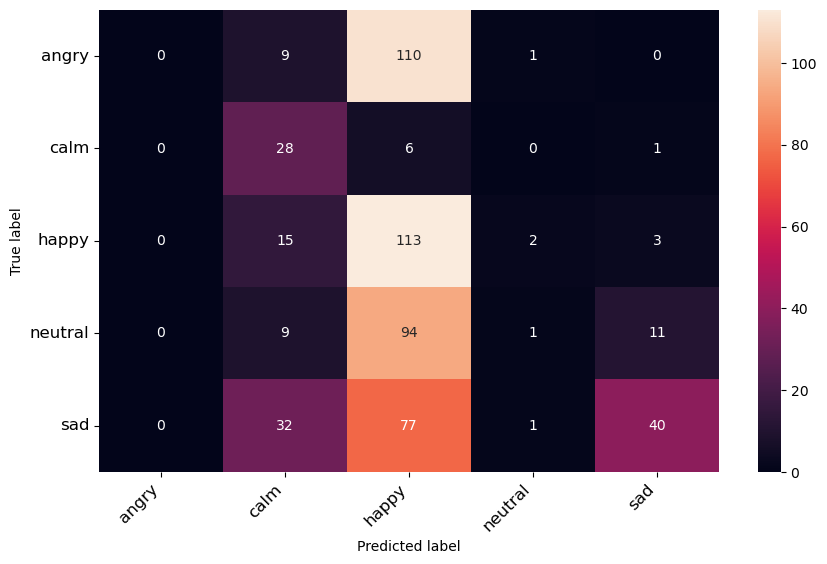

In [196]:
df_cm = pd.DataFrame(c_matrix, index=class_names, columns=class_names)

plt.figure(figsize=(10,6))
try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
except ValueError:
    raise ValueError("Confusion matrix values must be integers.")


heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Classification Report

In [198]:
from sklearn.metrics import classification_report
report = classification_report(y_true,y_pred)
print(report)

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       120
        calm       0.30      0.80      0.44        35
       happy       0.28      0.85      0.42       133
     neutral       0.20      0.01      0.02       115
         sad       0.73      0.27      0.39       150

    accuracy                           0.33       553
   macro avg       0.30      0.38      0.25       553
weighted avg       0.33      0.33      0.24       553



# Data Preprocessing for CNN and other classifiers

In [27]:
X = features.drop('labels',axis = 1)
Y = features['labels']

In [28]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,shuffle = True)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1616, 81), (1616, 7), (404, 81), (404, 7))

In [30]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1616, 81), (1616, 7), (404, 81), (404, 7))

# Decision Tree

In [31]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred = clf.predict(x_test)

In [33]:
print(f'the training score for decision tree is {clf.score(x_train,y_train)}')

the training score for decision tree is 1.0


In [34]:
print(f'the test score for decision tree is {clf.score(x_test,y_test)}')

the test score for decision tree is 0.9628712871287128


# MLP CLASSIFIER

In [35]:
from sklearn.neural_network import MLPClassifier
clf2=MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)
clf2.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=270, hidden_layer_sizes=(400,),
              learning_rate='adaptive', max_iter=400)

In [36]:
print(f"Training set score: {(clf2.score(x_train, y_train))}")
print(f"Test set score: {(clf2.score(x_test, y_test))}")

Training set score: 1.0
Test set score: 0.995049504950495


# CNN

In [37]:
import tensorflow as tf
#import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,AveragePooling1D,Dropout,add,BatchNormalization,LSTM,Flatten,MaxPooling1D,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from keras.activations import relu, softmax
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
#CNN
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((1616, 81, 1), (1616, 7), (404, 81, 1), (404, 7))

In [39]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=2,)

In [40]:
my_model=Sequential()
my_model.add(Conv1D(256, kernel_size=7, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())

my_model.add(Conv1D(128, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())


my_model.add(Conv1D(64, kernel_size=7, strides=1, padding='same', activation='relu'))
my_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
        
my_model.add(Flatten())
my_model.add(Dense(units=32, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(units=7, activation='softmax'))
my_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 81, 256)           2048      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 41, 256)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 41, 256)          1024      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 41, 128)           229504    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 21, 128)          0         
 1D)                                                             
                                                        

In [41]:
history = my_model.fit(x_traincnn, y_train, batch_size=32, epochs=50, validation_data=(x_testcnn, y_test),callbacks = early_stopping)

Epoch 1/50
51/51 [==============================] - 12s 39ms/step - loss: 1.0977 - accuracy: 0.6522 - val_loss: 1.6017 - val_accuracy: 0.4851
Epoch 2/50
51/51 [==============================] - 1s 23ms/step - loss: 0.4345 - accuracy: 0.8657 - val_loss: 1.4496 - val_accuracy: 0.5743
Epoch 3/50
51/51 [==============================] - 1s 23ms/step - loss: 0.2273 - accuracy: 0.9239 - val_loss: 1.2837 - val_accuracy: 0.5594
Epoch 4/50
51/51 [==============================] - 1s 23ms/step - loss: 0.1588 - accuracy: 0.9455 - val_loss: 1.0887 - val_accuracy: 0.7030
Epoch 5/50
51/51 [==============================] - 1s 22ms/step - loss: 0.1621 - accuracy: 0.9486 - val_loss: 0.5938 - val_accuracy: 0.9356
Epoch 6/50
51/51 [==============================] - 1s 23ms/step - loss: 0.1298 - accuracy: 0.9616 - val_loss: 0.3723 - val_accuracy: 0.9183
Epoch 7/50
51/51 [==============================] - 1s 23ms/step - loss: 0.0942 - accuracy: 0.9678 - val_loss: 0.1724 - val_accuracy: 0.9530
Epoch 8/50
5

13/13 [==============================] - 0s 14ms/step - loss: 0.0071 - accuracy: 0.9950
Accuracy of our model on test data :  100.0 %


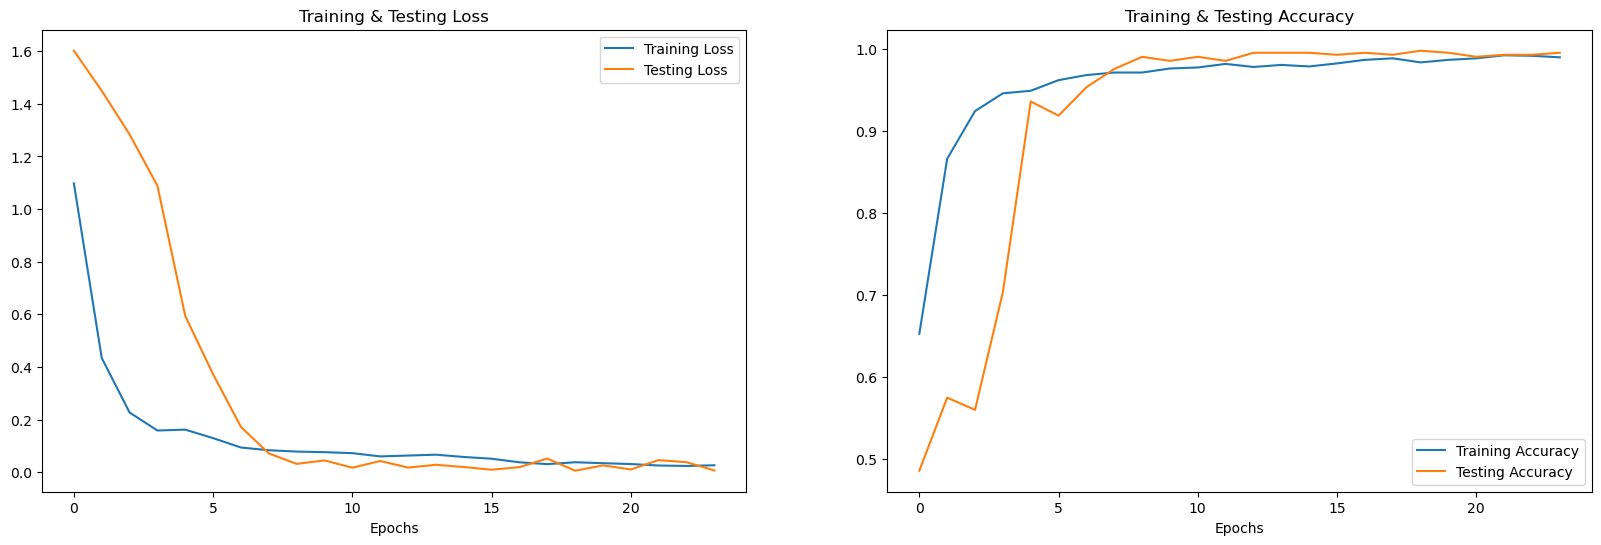

In [43]:
print("Accuracy of our model on test data : " , round(my_model.evaluate(x_testcnn,y_test)[1],2)*100 , "%")

epochs = [i for i in range(24)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [44]:
# predicting on test data.
pred_test = my_model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

13/13 [==============================] - 0s 6ms/step


In [45]:
testdf = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
testdf['Predicted Labels'] = y_pred.flatten()
testdf['Actual Labels'] = y_test.flatten()

In [46]:
testdf

,Predicted Labels,Actual Labels
0,surprise,surprise
1,angry,angry
2,surprise,surprise
3,happy,happy
4,sad,sad
...,...,...
399,fear,fear
400,sad,sad
401,neutral,neutral
402,sad,sad


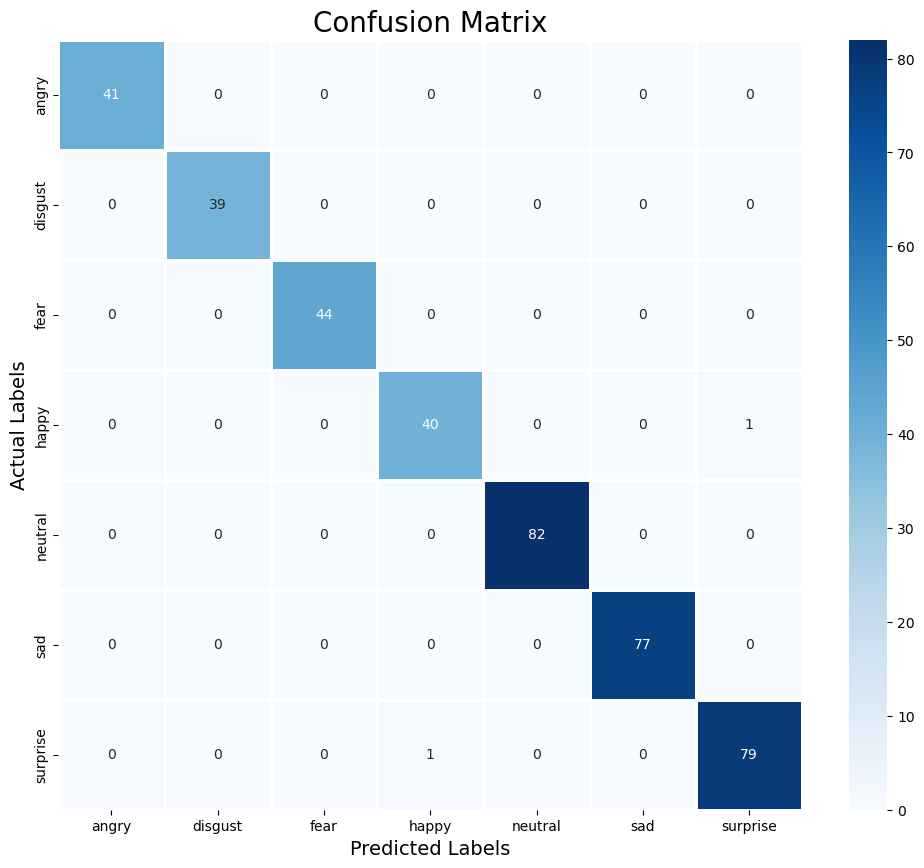

In [47]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        41
     disgust       1.00      1.00      1.00        39
        fear       1.00      1.00      1.00        44
       happy       0.98      0.98      0.98        41
     neutral       1.00      1.00      1.00        82
         sad       1.00      1.00      1.00        77
    surprise       0.99      0.99      0.99        80

    accuracy                           1.00       404
   macro avg       0.99      0.99      0.99       404
weighted avg       1.00      1.00      1.00       404

